In [1]:
import os


# comment char
_COMMENT_CHAR = '#'


def read_list_from_file(fn: str, items_per_line=None, separator=None, comment_char=_COMMENT_CHAR):
    """
    Read a list from given file
    Note: list file is organized by lines, comments are started with _COMMENT_CHAR
    :param fn: file name
    :param items_per_line: number of items per line
    :param separator: separator. Using space char when None
    :param comment_char: char indicating comment
    :return:
    """
    def get_items(src_line: str):
        if items_per_line is None:
            items = src_line.split(separator)
        else:
            items = src_line.split(separator, items_per_line)[: items_per_line]
        return items[0] if len(items) == 1 else items

    # check parameters
    assert os.path.exists(fn)
    assert (items_per_line is None) or (items_per_line > 0)
    # store result
    result = []
    # read file
    with open(fn, 'r') as f:
        # handle lines
        while True:
            line = f.readline()
            if not line:
                break
            line = line.strip()
            if line.startswith(comment_char):
                continue
            result.append(get_items(line))
    # return result
    return result

In [7]:
fn = "/media/aiteam/DataAI/STEPS/split_files/robotcar/2014-12-16-18-44-24/test_split.txt"
files = read_list_from_file(fn, 1)
print(len(files))
print(files[:20])

411
['1418757162925551', '1418757162988042', '1418757163050532', '1418757163113023', '1418757163175517', '1418757163238009', '1418757163300500', '1418757163362990', '1418757163425483', '1418757163487974', '1418757163550466', '1418757163612958', '1418757163675448', '1418757163737939', '1418757163800433', '1418757163862923', '1418757163925416', '1418757163987906', '1418757164050399', '1418757164112891']


In [2]:
import cv2
im = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-09-13-21-02/rgb/1418132636269527.png")

In [25]:
import matplotlib.pyplot as plt
import numpy as np

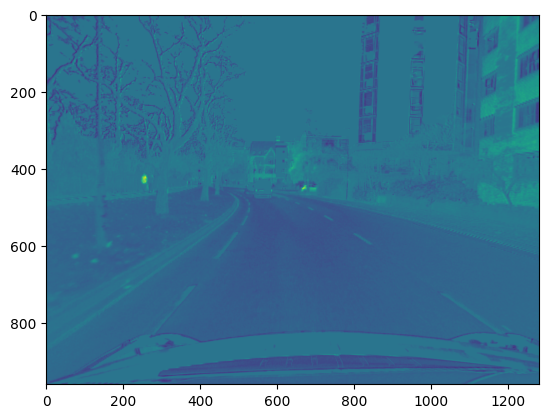

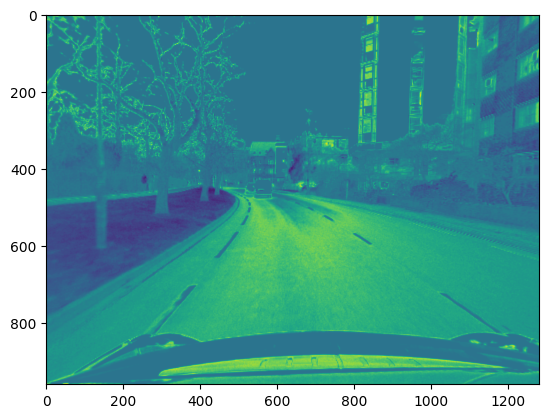

[221 240   9 ... 108  14  80]


In [22]:
im_ycbcr1 = cv2.cvtColor(im, cv2.COLOR_RGB2YCrCb)
plt.imshow(im_ycbcr1[:,:,2])
plt.show()

im_ycbcr2 = cv2.cvtColor(im, cv2.COLOR_BGR2YCrCb)
plt.imshow(im_ycbcr2[:,:,2])
plt.show()

print(sum(im_ycbcr1[:,:,0] - im_ycbcr2[:,:,0]))

In [49]:

def rgb2yCbCr(input_im):
    # Ensure input is in the range [0, 255]
#     input_im = np.clip(input_im, 0, 255)

    # Flatten the input image and convert to float
    im_flat = input_im.reshape(-1, 3).astype(np.float32)

    # Define the transformation matrix for RGB to YCbCr conversion
    mat = np.array([[0.299, 0.587, 0.114],
                    [-0.169, -0.331, 0.500],
                    [0.500, -0.419, -0.081]], dtype=np.float32)

    # Define the bias values for RGB to YCbCr conversion
    bias = np.array([0.0, 128.0, 128.0], dtype=np.float32)

    # Perform the RGB to YCbCr conversion using matrix multiplication and addition
    temp = np.dot(im_flat, mat.T) + bias

    # Reshape the result back to the original image shape
    out = temp.reshape(input_im.shape)

    # Clip the output to ensure it is in the range [0, 255]
#     out = np.clip(out.astype(int), 0, 255)

    return out


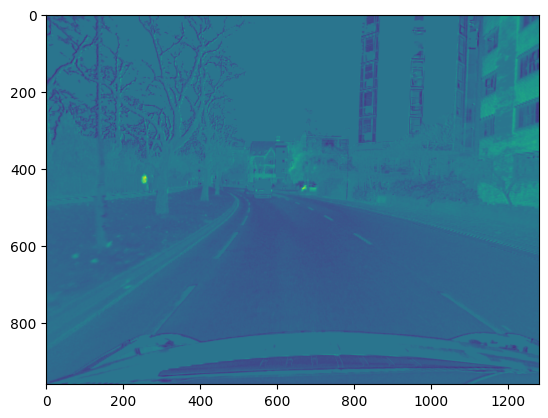

In [50]:
im_rgb2yCbCr = rgb2yCbCr(im)
plt.imshow(im_rgb2yCbCr[:,:,1])
plt.show()

In [54]:
np.max(im_rgb2yCbCr)

255.0